### Stock Market Prediction Using  LSTM

In [ ]:
# Data Set used is Last 1 year named= AAPL.csv
# Predicted next 5 days stock price

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
import tensorflow as tf

from sklearn.preprocessing import MinMaxScaler
import math
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from numpy import array

In [2]:
df=pd.read_csv('AAPL.csv')

In [3]:
df.head()

Date        Open        High         Low       Close   Adj Close  \
0  2021-03-15  121.410004  124.000000  120.419998  123.989998  123.257416   
1  2021-03-16  125.699997  127.220001  124.720001  125.570000  124.828079   
2  2021-03-17  124.050003  125.860001  122.339996  124.760002  124.022865   
3  2021-03-18  122.879997  123.180000  120.320000  120.529999  119.817863   
4  2021-03-19  119.900002  121.430000  119.680000  119.989998  119.281052   

      Volume  
0   92403800  
1  115227900  
2  111932600  
3  121229700  
4  185549500

In [4]:
df1=df.reset_index()['Close']

In [5]:
df1

0      123.989998
1      125.570000
2      124.760002
3      120.529999
4      119.989998
          ...    
248    157.440002
249    162.949997
250    158.520004
251    154.729996
252    154.729996
Name: Close, Length: 253, dtype: float64

In [6]:
df2=df
df2=df2.drop(["Open","High","Low","Adj Close","Volume"],axis=1)
df2

Date       Close
0    2021-03-15  123.989998
1    2021-03-16  125.570000
2    2021-03-17  124.760002
3    2021-03-18  120.529999
4    2021-03-19  119.989998
..          ...         ...
248  2022-03-08  157.440002
249  2022-03-09  162.949997
250  2022-03-10  158.520004
251  2022-03-11  154.729996
252  2022-03-11  154.729996

[253 rows x 2 columns]

In [7]:
df2['Date']=pd.to_datetime(df2['Date'],format='%Y%m%d',errors='ignore')

In [8]:
df2.set_index('Date',inplace=True)

<AxesSubplot:xlabel='Date'>

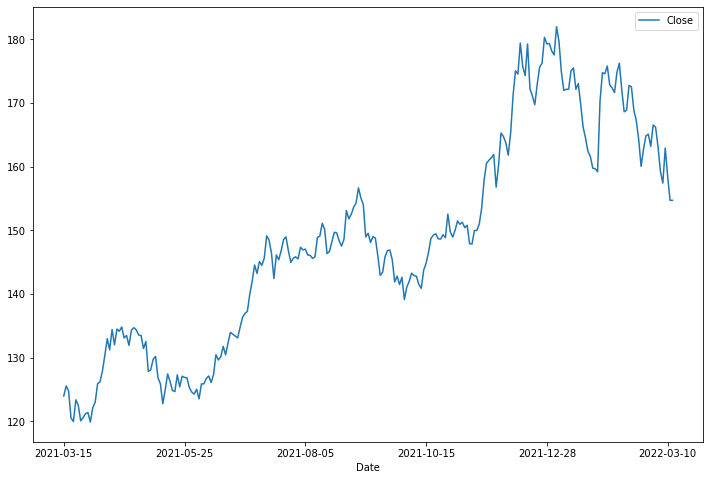

In [9]:
df2.plot(figsize=(12,8))

In [10]:
# To Normalize the data, we apply MinMax Scaler.

scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [11]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.70)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [12]:
training_size,test_size

(177, 76)

In [13]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [14]:
# reshape data
time_step = 25
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [15]:
print(X_train.shape), print(y_train.shape)

(151, 25)
(151,)


(None, None)

In [16]:
print(X_test.shape), print(ytest.shape)

(50, 25)
(50,)


(None, None)

In [17]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [18]:
## Sometimes this model is working and sometimes it is not..

model=Sequential()
model.add(LSTM(64,return_sequences=True,input_shape=(25,1)))
model.add(LSTM(64,return_sequences=True))
model.add(LSTM(64))
model.add(Dense(32))
model.add(Dense(16))
model.add(Dense(2))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [19]:
#model=Sequential()
#model.add(LSTM(64,return_sequences=True,input_shape=(25,1)))
#model.add(LSTM(64,return_sequences=True))
#model.add(LSTM(64))
#model.add(Dense(1))
#model.compile(loss='mean_squared_error',optimizer='adam')


In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 25, 64)            16896     
                                                                 
 lstm_1 (LSTM)               (None, 25, 64)            33024     
                                                                 
 lstm_2 (LSTM)               (None, 64)                33024     
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 2)                 34        
                                                                 
 dense_3 (Dense)             (None, 1)                 3

In [21]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1,shuffle=False)

Epoch 1/100
3/3 [==============================] - 9s 874ms/step - loss: 0.0791 - val_loss: 0.0155
Epoch 2/100
3/3 [==============================] - 0s 43ms/step - loss: 0.0246 - val_loss: 0.0173
Epoch 3/100
3/3 [==============================] - 0s 44ms/step - loss: 0.0161 - val_loss: 0.0429
Epoch 4/100
3/3 [==============================] - 0s 43ms/step - loss: 0.0121 - val_loss: 0.0769
Epoch 5/100
3/3 [==============================] - 0s 43ms/step - loss: 0.0111 - val_loss: 0.0477
Epoch 6/100
3/3 [==============================] - 0s 40ms/step - loss: 0.0070 - val_loss: 0.0168
Epoch 7/100
3/3 [==============================] - 0s 45ms/step - loss: 0.0100 - val_loss: 0.0104
Epoch 8/100
3/3 [==============================] - 0s 42ms/step - loss: 0.0120 - val_loss: 0.0137
Epoch 9/100
3/3 [==============================] - 0s 43ms/step - loss: 0.0090 - val_loss: 0.0241
Epoch 10/100
3/3 [==============================] - 0s 43ms/step - loss: 0.0076 - val_loss: 0.0273
Epoch 11/100
3/3 [

In [22]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [23]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [24]:
a=ytest.reshape(50,1)

In [25]:
a=scaler.inverse_transform(a)

In [26]:
#MAE, MSE, RMSE Error
print('Mean Absolute error: ', metrics.mean_absolute_error(a,test_predict))
print('Mean Squared Error: ', metrics.mean_squared_error(a,test_predict))
print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(a,test_predict)))

Mean Absolute error:  4.112533629550783
Mean Squared Error:  27.173769304870703
Root Mean Squared Error:  5.212846564485733


In [27]:
b = df['Adj Close'].tail(50)
df4 = pd.DataFrame(b)
df4['Predicted']=test_predict
df4.tail(5)

Adj Close   Predicted
248  157.440002  163.151230
249  162.949997  163.328476
250  158.520004  162.905823
251  154.729996  162.414352
252  154.729996  161.740738

In [28]:
len(test_data)

76

In [29]:
# i is input
x_input=test_data[51:].reshape(1,-1)
x_input.shape


(1, 25)

In [30]:
tmp=list(x_input)
tmp=tmp[0].tolist()

In [31]:
# Demonstrate prediction for next 5 days

output=[]
n_steps=25
i=0
while(i<5):
    
    if(len(tmp)>25):
        x_input=np.array(tmp[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        tmp.extend(yhat[0].tolist())
        tmp=tmp[1:]
        output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        tmp.extend(yhat[0].tolist())
        print(len(tmp))
        output.extend(yhat.tolist())
        i=i+1
    

print(output)

[0.63755685]
26
1 day input [0.88439875 0.90774438 0.84076636 0.7847368  0.78860101 0.85155365
 0.84768969 0.78860101 0.76316223 0.7151829  0.64675591 0.68974413
 0.72371613 0.72806308 0.69715022 0.75124781 0.74593462 0.69666722
 0.63435848 0.6044116  0.6931251  0.62180013 0.56077923 0.56077923
 0.63755685]
1 day output [[0.62100494]]
2 day input [0.90774438 0.84076636 0.7847368  0.78860101 0.85155365 0.84768969
 0.78860101 0.76316223 0.7151829  0.64675591 0.68974413 0.72371613
 0.72806308 0.69715022 0.75124781 0.74593462 0.69666722 0.63435848
 0.6044116  0.6931251  0.62180013 0.56077923 0.56077923 0.63755685
 0.62100494]
2 day output [[0.6090726]]
3 day input [0.84076636 0.7847368  0.78860101 0.85155365 0.84768969 0.78860101
 0.76316223 0.7151829  0.64675591 0.68974413 0.72371613 0.72806308
 0.69715022 0.75124781 0.74593462 0.69666722 0.63435848 0.6044116
 0.6931251  0.62180013 0.56077923 0.56077923 0.63755685 0.62100494
 0.60907263]
3 day output [[0.6017025]]
4 day input [0.7847368  

In [32]:
day_new=np.arange(1,26)
day_pred=np.arange(26,31)

In [33]:
len(df1)

253

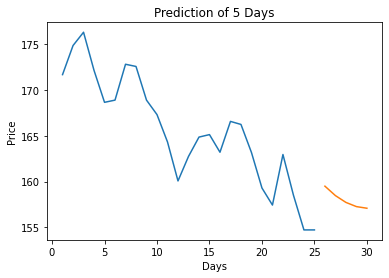

In [34]:
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Prediction of 5 Days')
plt.plot(day_new,scaler.inverse_transform(df1[228:]))
plt.plot(day_pred,scaler.inverse_transform(output))

In [35]:
pred=scaler.inverse_transform(output)
pred

array([[159.49865355],
       [158.47061442],
       [157.72949851],
       [157.27174077],
       [157.09330965]])

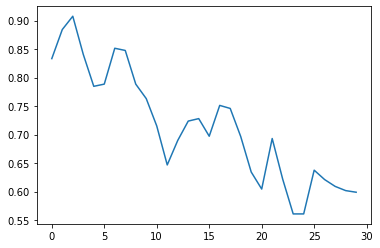

In [36]:
df3=df1.tolist()
df3.extend(output)
plt.plot(df3[228:])

In [37]:
df3=scaler.inverse_transform(df3).tolist()

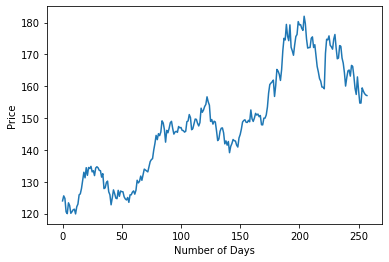

In [38]:
plt.xlabel('Number of Days')
plt.ylabel('Price')
plt.plot(df3)

In [39]:
#Prediction of next 5 days(1 week)
dt=['2022-03-14','2022-03-15','2022-03-16','2022-03-17','2022-03-18']
df5 = pd.DataFrame(dt,columns=['Date'])
df5['Predicted Price'] = pred
df5

Date  Predicted Price
0  2022-03-14       159.498654
1  2022-03-15       158.470614
2  2022-03-16       157.729499
3  2022-03-17       157.271741
4  2022-03-18       157.093310